## 課題提出時（2018/11/23）の所感
非常に勉強になったsprintでした。２日目でエポック毎の学習曲線をみて、lossが下がっているグラフを確認できたときはとても嬉しかったです。１つ１つの処理を紙に書き出して、整理して、書籍を読みながらコーディングしました。特にshapeをソースの中のコメントにも記載しました。誤差逆伝播の計算グラフの考え方とコードを学べたのはとても楽しかったです。  次のステップは、何も見ないでゼロから自分の考えているコードを自由に書けるようになることを目指したいです。なんとか課題の通りに、一通り通しましたが、体に身に付いている（＝染み付いている）かと言うとまだまだなので、次のsprintでも試行錯誤して行きます。  

<出来ていないこと>  
・学習曲線のプロットで、valデータの学習曲線を描画出来ていない  
・ノード数を変えたチューニングが出来ていない  


# 1.この課題の目的
・スクラッチを通してニューラルネットワークの基礎を理解する  
・基本的な深層学習のキーワードを学習する  
・画像データの簡単な扱い方を知る  

# 2.進め方
・スクラッチで実装する。（1日目〜2日目）  
・手法の説明を記述する。（2日目夜発表）  

# 3.スクラッチによる実装
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していく。TensorFlowなどは使用しない。

今回は多クラス分類を行う3層のニューラルネットワークを作成する。層の数などを固定した上でニューラルネットワークの基本を確認する。次のsprintで層を自由に変えられる設計にしていく。

今回確認する  
・Pythonのスキル  
・画像の可視化  
・変数の型  

データセットの用意  
MNISTデータセットを使用する。以下のコードを実行すればscikit-learnによりデータセットをダウンロードし、展開まで行える。はじめて実行した際に、mnist_dirで指定した場所にファイルがダウンロードされる。

In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import numpy as np

# 保存先を指定
mnist_dir = "/Users/tsuneo/git/diveintocode-term2/mnist_data"

# MNISTの読み込み
mnist = fetch_mldata('MNIST original', data_home=mnist_dir)

# trainとtestに分割する
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.14285, shuffle=False)

print("--int型へ変更前--")
print(X_train.dtype)
print(y_test.dtype)

# ラベルをint型にしておく
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

print("--int型へ変更後--")
print(X_train.dtype)
print(y_test.dtype)

--int型へ変更前--
uint8
float64
--int型へ変更後--
uint8
int64


In [2]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [3]:
# mnistの中確認
dir(mnist)

['COL_NAMES', 'DESCR', 'data', 'target']

In [4]:
mnist.COL_NAMES

['label', 'data']

In [5]:
mnist.target

array([0., 0., 0., ..., 9., 9., 9.])

In [6]:
mnist.data.shape

(70000, 784)

In [7]:
mnist.DESCR

'mldata.org dataset: mnist-original'

In [8]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].dtype)
print(X_train[0])

(60000, 784)
(10000, 784)
uint8
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 25

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


## 画像データの可視化

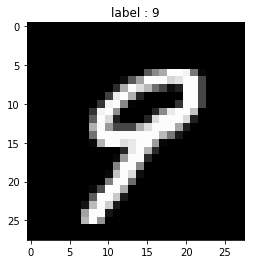

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 56419
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

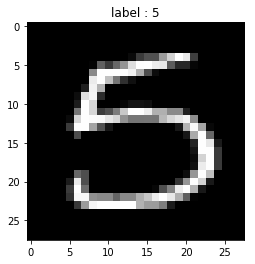

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [11]:
# 発展的話題
index = 33400
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
#plt.imshow(image, 'gray', vmin=0,vmax=255)
plt.imshow(image, 'gray',)
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

## 前処理

In [12]:
# 特徴量だけを、float型へ変換している
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)

# 最大値・最小値の確認（処理前）
print(X_train.max())
print(X_train.min())
print("----")

# 正則化？正規化？標準化？している
X_train /= 255
X_test /= 255

# 最大値・最小値の確認（処理前）
print(X_train.max())
print(X_train.min())

255.0
0.0
----
1.0
0.0


<font color="red">
mnistでは正解ラベルは０から９の整数であるが、ニューラルネットワークで多クラス分類を行う際にはone-hot表現に変換する。そのため、scikit-learnのOneHotEncoderを使用する。このone-hot表現による値はそのラベルである確率を示していることから、float型で扱う。</font>

In [13]:
y_train.shape

(60000,)

In [14]:
y_train

array([0, 0, 0, ..., 9, 9, 9])

## 学習用データ6万枚を分割する

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print("X_train    :",X_train.shape)
print("X_val    :",X_val.shape)

X_train    : (48000, 784)
X_val    : (12000, 784)


In [16]:
#  one-hot表現にする
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# 教師ラベルだけ変換する
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

# shapeの確認
print("y_train.shape    　　　　　　　　　　　　　　　　:   ",y_train.shape)
print("y_train_one_hot.shape    :   ",y_train_one_hot.shape)
print("y_train_one_hot.型  　　　　　　  :   ",y_train_one_hot.dtype)
print("------")
print("y_test.shape  　　　　　　　　　　　　　　　　  :   ",y_test.shape)
print("y_test_one_hot.shape    :   ",y_test_one_hot.shape)
print("y_test_one_hot.型　　　　　　    :   ",y_test_one_hot.dtype)

y_train.shape    　　　　　　　　　　　　　　　　:    (48000,)
y_train_one_hot.shape    :    (48000, 10)
y_train_one_hot.型  　　　　　　  :    float64
------
y_test.shape  　　　　　　　　　　　　　　　　  :    (10000,)
y_test_one_hot.shape    :    (10000, 10)
y_test_one_hot.型　　　　　　    :    float64


In [17]:
len(X_train)

48000

## ニューラルネットワーク分類器のクラスを作成する
ニューラルネットワーク分類器のクラスScratchSimpleNeuralNetworkClassifierを作成する。

## 活性化関数（フォワードプロパゲーション）

In [18]:
# シグモイド関数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# ハイパボリックタンジェント関数
# def tanh(x):
#     return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

## ソフトマックス関数

In [19]:
# ソフトマックス関数
# def softmax_old(x):
#     #c = np.max(x)
#     #return np.exp(x - c)/np.sum(np.exp(x - c))
#     return np.exp(x )/np.sum(np.exp(x ))

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

#np.sum(softmax(X),axis=1) #チェック

## 交差エントロピー誤差

In [20]:
# 交差エントロピー誤差
# この関数はミニバッチ単位の損失値を算出するためのもの。１件（1行）単位の損失を出している訳ではない
# この「sum」は、この関数に入ってきたデータ数全部の値を足している。それを件数で割っている
# つまり、学習曲線をミニバッチ単位で描画したいためのものである。
# もし、１件単位で損失値を算出したいのであれば、np.sumではaxis=1にしてあげれば、行単位・１件単　の損失値が算出できる
def cross_entropy_error(y_pred, y_train):
    if y_pred.ndim == 1:
        y_train = y_train.reshape(1, y_train.size)
        y_pred = y_pred.reshape(1, y_pred.size)
    
    batch_size = y_pred.shape[0]
    #print(y_train * np.log(y_pred)) 
    # c = y_train * np.log(y_pred)
    #print(c.shape) 
    #print(c)
    #print(c.sum())
    
    # １件単位で損失値を算出したい場合
    #return -np.sum(y_train * np.log(y_pred), axis=1)

    #ミニバッチ単位の損失
    return -np.sum(y_train * np.log(y_pred + 1e-7)) / batch_size

## ミニバッチ処理

In [21]:
class GetMiniBatch():
    """
    ミニバッチを取得するイテレータ
    
    Parameters
    ---------------------
    X　:　学習データ
    y　:　正解値
    batch_size : int
    seed : int　　　NumPyの乱数のシード
    
    ---------------------
    for文で呼び出すと以下の２つを返す
    mini_X  : 学習データのミニバッチ 
    mini_y  : 正解値のミニバッチ
    """
    
    def __init__(self, X, y, batch_size=10, seed=0):
        
        # バッチサイズを指定
        self.batch_size = batch_size
        
        # ランダムに並べ換える
        np.random.seed(seed)
        
        # 48,000行、列？のベクトルが作成される
        # 中身は1から48,000の整数値がランダムにセットされる
        # なるほど、名前からしてそうだね。シャッフルインデックス。。
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._counter = 0
        
        # イテレーション数を計算する
        # 48,000行/10 = 4,800回となる
        # np.ceilは切り上げする関数
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        # len()が使われたときの処理
        return self._stop
        
    def __iter__(self):
        return self
        
    def __next__(self):
            
        # for文で呼ばれた際のループごとの処理
        if self._counter >= self._stop:
                
            # 最後まで進んだら終了
            self._counter = 0 # カウンターをリセット
            raise StopIteration()
        
        
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
            
        self._counter = self._counter + 1
            
        return self.X[p0:p1], self.y[p0:p1]
        

## 重みの初期値
## NNスクラッチ
## フォワードプロパゲーション
## バックプロパゲーション

In [22]:
class ScratchSimpleNeuralNetworkClassifier():
    """
    シンプルな３層ニューラルネットワーク分類器
    """
    
    def __init__(self, verbose, sigma, lr, epoch):
        self.verbose = verbose
        
        # softmaxの出力（予測値）
        self.y_pred = None
        
        #sigma
        self.sigma = sigma
        
        # 学習率
        self.lr = lr
        
        # エポック
        self.epoch = epoch
        
        # 教師データ（one-hot vector）
        self.y_train_one_hot = None
        
        # 重み・バイアス
        self.w1 = self.sigma*np.random.randn(784, 400)
        self.w2 = self.sigma*np.random.randn(400, 200)
        self.w3 = self.sigma*np.random.randn(200, 10)
        self.b1 = self.sigma*np.random.randn(400)
        self.b2 = self.sigma*np.random.randn(200)
        self.b3 = self.sigma*np.random.randn(10)
        
        # 損失値
        self.loss = None
        
        # 損失表(ミニバッチ毎)
        self.loss_list = []
        
        # 損失表（エポック毎）
        self.loss_list_epoch = []
        
        # 予測値表
        self.pred_list = []
    
    def fit(self, X_train, y_train_one_hot, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する
        
        """
        self.y_train_one_hot = y_train_one_hot
        
        #エポックのループ
        for i in range(self.epoch):
        
            # ミニバッチ単位でデータを確保
            get_mini_batch = GetMiniBatch(X_train, y_train_one_hot, batch_size=10, seed=0)

            # ミニバッチ単位で勾配更新
            for mini_X_train, mini_y_train in get_mini_batch:

                # 1層目  ############################################
                # (10, 784) * (784, 400)  =>  (10, 400)   +   (400,) => (10, 400)
                rayer1_pre = np.dot(mini_X_train, self.w1) + self.b1

                # 活性化関数　：　シグモイド
                #rayer1_out = sigmoid(rayer1_pre)

                # 活性化関数　：　ハイパボリック
                # (10, 400)　　・・・シェイプは変わらず
                rayer1_out = np.tanh(rayer1_pre)

                # 2層目  ############################################
                #  (10, 400) * (400, 200)  =>  (10, 200)  + (200, )  => (10, 200)
                rayer2_pre = np.dot(rayer1_out, self.w2) + self.b2

                # 活性化関数　：　シグモイド
                #rayer2_out = sigmoid(rayer2_pre)

                # 活性化関数　：　ハイパボリック
                # (10, 200)　・・・シェイプは変わらず
                rayer2_out = np.tanh(rayer2_pre)

                # 3層目  ############################################
                #  (10, 200) * (200, 10)  =>  (10, 10)  + (10, )  => (10, 10)
                rayer3_pre = np.dot(rayer2_out, self.w3) + self.b3

                # 活性化関数　：　ソフトマックス
                # (10, 10) ・・・シェイプは変わらず
                # これが予測値(Z3)となる
                rayer3_out = softmax(rayer3_pre)

                # 損失関数で、ミニバッチ単位の誤差を算出する
                # スカラー値となる
                self.loss = cross_entropy_error(rayer3_out, mini_y_train)

                # 損失値表
                self.loss_list.append(self.loss)

                # ここから誤差逆伝播する####################################
                # 予測ラベル  -  正解ラベル  ∂L/∂A3
                # これに学習率を掛ければ良い

                ######3層目######
                # b3の勾配 (10, 10) - (10, 10) => (10, 10)
                delta_A3 = rayer3_out - mini_y_train

                # B3の勾配
                delta_B3 = delta_A3

                # w3の勾配(200, 10)  <=   (200, 10) * (10, 10)
                delta_w3 = np.dot(rayer2_out.T, delta_A3)

                ######2層目######
                # z2（つまりrayer2_out）でLを微分した値  ∂L/∂z2
                # (10, 10) * (10, 200) => (10, 200)
                delta_z2 = np.dot(delta_A3, self.w3.T)

                # ∂L/∂A2 = ∂L/∂z2 * (1 - tanh(A2)**2)
                #(10, 200) アダマール積 (10, 200) => (10, 200)
                delta_A2 = delta_z2 * (1 - np.tanh(rayer2_pre)**2)

                # ∂L/∂B2 = ∂L/∂A2   (10, 200)
                delta_B2 = delta_A2

                # w2の勾配 (400, 200)   <=  (400, 10) ,(10, 200)
                delta_w2 = np.dot(rayer1_out.T, delta_A2)

                ######1層目######
                # ∂L/∂z1(つまり(rayer1_out))　(10, 400)  <= (10, 200), (200, 400)
                delta_z1 = np.dot(delta_A2, self.w2.T)

                # (10, 400)アダマール積(10, 400)   => (10, 400)
                delta_A1 = delta_z1 * (1 - np.tanh(rayer1_pre)**2)

                # ∂L/∂B1 = ∂L/∂A1   (10, 400)
                delta_B1 =  delta_A1

                # w1の勾配(784, 400)　   <=    (784, 10) * (10, 400)
                delta_w1 = np.dot(mini_X_train.T, delta_A1)

                # 1層目の更新
                self.w1, self.b1 = self._update_wb(self.w1, self.b1, delta_w1, delta_B1)
                self.w2, self.b2 = self._update_wb(self.w2, self.b2, delta_w2, delta_B2)
                self.w3, self.b3 = self._update_wb(self.w3, self.b3, delta_w3, delta_B3)
            
            self.loss_list_epoch.append(self.loss)


            #if self.verbose:
                #verboseをTrueにした際は学習過程などを出力する
                #print()
            #pass

    def _update_wb(self, w, b, delta_w, delta_b):
        #　重みの更新
        w = w - self.lr * (delta_w)
        
        # バイアスの更新
        delta_b = np.average(delta_b, axis=0)
        b = b - self.lr * (delta_b)
        
        return w, b
    
    
    # 推定処理
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する
        """
        
        # 1層目  ############################################
        rayer1_pre = np.dot(X, self.w1) + self.b1
        rayer1_out = np.tanh(rayer1_pre)

        # 2層目  ############################################
        rayer2_pre = np.dot(rayer1_out, self.w2) + self.b2
        rayer2_out = np.tanh(rayer2_pre)

        # 3層目  ############################################
        rayer3_pre = np.dot(rayer2_out, self.w3) + self.b3
        rayer3_out = softmax(rayer3_pre)
        
        rayer3_out = np.argmax(rayer3_out, axis=1)

        #print(rayer3_out)
        #print("rayer3_outのシェイプ　　：　　　",rayer3_out.shape)
        
        return rayer3_out

### ケース1

In [23]:
# ケース１
# sigma = 0.01
# 学習率 = 0.0001
# epoch = 20
ssnnc1 = ScratchSimpleNeuralNetworkClassifier(verbose=True, sigma=0.01, lr=0.0001, epoch=20)
ssnnc1.fit(X_train, y_train_one_hot)

In [24]:
# 1エポック（4,800回のミニバッチ）を２０エポック回したので、96,000回、ミニバッチを回しました。
len(ssnnc1.loss_list)

96000

## 学習曲線のプロット

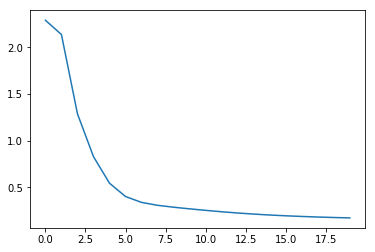

In [25]:
# エポック毎のlossを描画
# lossが下がっていることがわかる！　うまく学習できているようです
plt.plot(ssnnc1.loss_list_epoch)
plt.show()

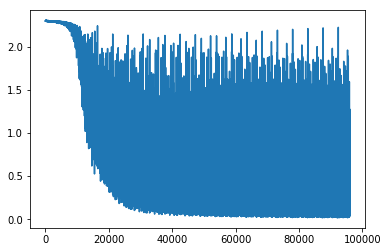

In [26]:
# ミニバッチ単位だとなんだかよく分からないグラフになります。なぜこんなにブレるのか上手く説明できません。
plt.plot(ssnnc1.loss_list)
plt.show()

## 予測（推定）してみる

In [27]:
# 最小のロスを確認
min(ssnnc1.loss_list)

0.01444506293508081

In [28]:
# 1.2万毎を予測した
y_pred1 = ssnnc1.predict(X_val)

## 評価してみる

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
# 予測結果は９０％を超えました。
acc1 = accuracy_score(y_val, y_pred1)
acc1

0.9078333333333334

# チューニング

### ケース2
sigma、学習率、エポック共に、ケース１よりも下げて（値自体はあげて）みる。結果が悪くなることを予測しました。

In [31]:
# ケース２
# sigma = 0.1
# 学習率 = 0.01
# epoch = 10
ssnnc2 = ScratchSimpleNeuralNetworkClassifier(verbose=True, sigma=0.1, lr=0.01, epoch=10)
ssnnc2.fit(X_train, y_train_one_hot)

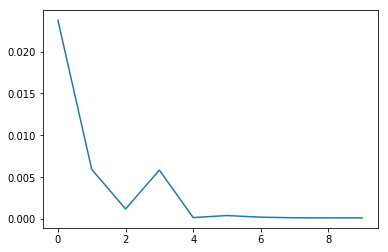

In [32]:
# エポック毎のlossを描画
# 過学習を起こしているのかな。lossの値が低すぎるように思う
plt.plot(ssnnc2.loss_list_epoch)
plt.show()

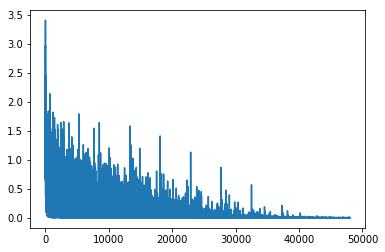

In [33]:
# ミニバッチ単位のlossを描画
plt.plot(ssnnc2.loss_list)
plt.show()

In [48]:
# 最小のロスを確認
min(ssnnc2.loss_list)

2.062403775027759e-07

In [34]:
# 予測値を取得する
y_pred2 = ssnnc2.predict(X_val)

In [35]:
# 予測結果はなんと97%
acc2 = accuracy_score(y_val, y_pred2)
acc2

0.98025

### ケース3
ケース２では、粗いハイパーパラメータで実施したところ、どうやら過学習しているように見える。今回はsigmaの値だけを上げて（数値自体は下げる）みる。

In [36]:
# ケース３
# sigma = 0.01
# 学習率 = 0.01
# epoch = 10
ssnnc3 = ScratchSimpleNeuralNetworkClassifier(verbose=True, sigma=0.01, lr=0.01, epoch=10)
ssnnc3.fit(X_train, y_train_one_hot)

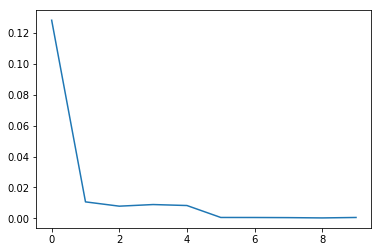

In [37]:
# エポック毎のlossを描画
# うーん、初回のlossの数値が低い。0に張り付いている。
plt.plot(ssnnc3.loss_list_epoch)
plt.show()

In [38]:
# 最小のロスを確認
min(ssnnc3.loss_list)

3.2075088600251034e-07

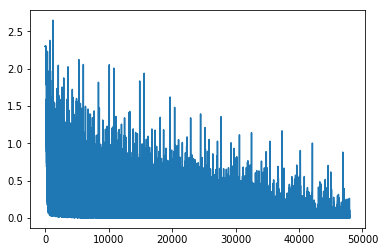

In [39]:
# ミニバッチ単位のlossを描画
plt.plot(ssnnc3.loss_list)
plt.show()

In [40]:
# 予測値を取得する
y_pred3 = ssnnc3.predict(X_val)

In [41]:
# 予測結果は９７％超え。ミニバッチ図は相変わらずだめ。ケース４では学習率を一桁下げて0.0０1で再度実行
acc3 = accuracy_score(y_val, y_pred3)
acc3

0.976

### ケース4
ケース３でもまだ過学習しているように見える。学習率をもう一桁下げてみる。

In [42]:
# ケース４
# sigma = 0.01
# 学習率 = 0.001
# epoch = 10
ssnnc4 = ScratchSimpleNeuralNetworkClassifier(verbose=True, sigma=0.01, lr=0.001, epoch=10)
ssnnc4.fit(X_train, y_train_one_hot)

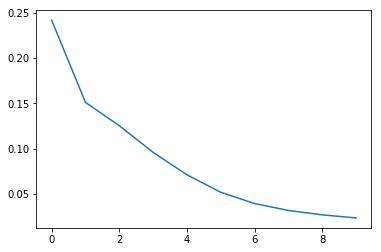

In [43]:
# エポック毎のlossを描画
plt.plot(ssnnc4.loss_list_epoch)
plt.show()

In [49]:
# 最小のロスを確認
min(ssnnc4.loss_list)

0.0016934277857983578

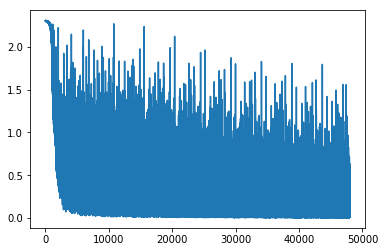

In [45]:
# ミニバッチ単位のlossを描画
plt.plot(ssnnc4.loss_list)
plt.show()

In [46]:
# 予測値を取得する
y_pred4 = ssnnc4.predict(X_val)

In [60]:
# 予測結果
# なかなか良いのではないでしょうか。ケース１よりも良い気がする。ただ、まだ過学習しているような気がする。
acc4 = accuracy_score(y_val, y_pred4)
acc4

0.9589166666666666

### ケース5
ケース1との違いはエポックだけ。ケース１の半分のエポックで確認する。

In [51]:
# ケース４
# sigma = 0.01
# 学習率 = 0.0001
# epoch = 10
ssnnc5 = ScratchSimpleNeuralNetworkClassifier(verbose=True, sigma=0.01, lr=0.0001, epoch=10)
ssnnc5.fit(X_train, y_train_one_hot)

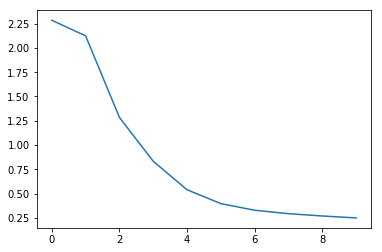

In [52]:
# エポック毎のlossを描画
plt.plot(ssnnc5.loss_list_epoch)
plt.show()

In [61]:
# 最小のロスを確認
min(ssnnc5.loss_list)

0.03763934686530308

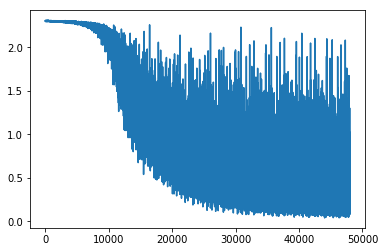

In [62]:
# ミニバッチ単位のlossを描画
plt.plot(ssnnc5.loss_list)
plt.show()

In [63]:
# 予測値を取得する
y_pred5 = ssnnc5.predict(X_val)

In [64]:
# 予測結果
# ケース１とケース５が良いのではないでしょうか。学習率が荒いと過学習してしまうようです。
acc5 = accuracy_score(y_val, y_pred5)
acc5

0.88375

# 誤分類の確認（オプション）
ケース1の結果の学習済みモデルを使用

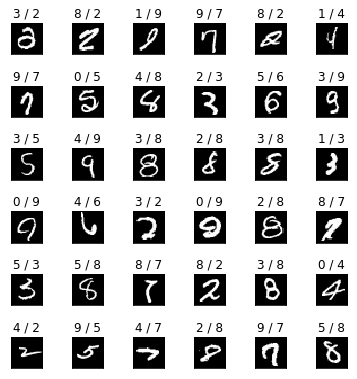

In [65]:
"""
誤分類結果を並べて表示する。画像の上の表示は「推定結果／正解」である

y_pred : 推定値のndarray
y_val  :  検証用データの正解ラベル
X_val  :  検証用データの特徴量
"""

num = 36

true_false = y_pred1 == y_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
    
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8, bottom=0, top=0.8, hspace=1, wspace=0.5)

for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred1[false_list[i]], y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1, 28, 28)[false_list[i]], cmap='gray')



# 説明

【ニューラルネットワークの仕組み】  
人間の脳の仕組みを利用してコンピュータに応用したものです。ニューラルネットワークは機械学習のおけるアルゴリズムの１つです。


【バックプロパゲーションとは何か】  
予測値と正解ラベルとの差（誤差）を元にして、各層の重みパラメータとバイアスを微調整していく処理のことです。
各層の「重みW」および「バイアスB」それぞれで、「損失関数L」を偏微分してあげて、その偏微分（＝傾き）を小さくするように「重みW」と「バイアスB」を微調整することをバックプロパゲーション（誤差逆伝搬）と言います。手法としては、「数値微分」と「計算グラフ」で行う方法があります。今回の実装は「計算グラフ（連鎖率）」で行いました。計算グラフの方が数値微分よりも処理が高速に行えます。

【活性化関数の役割とは何か】  
今回の課題では、全結合（np.dot(X,W)+B）で行った結果を「０＜全結合の結果値＜１」の間に分布させている。全結合した値をそのまま次の層の入力とするのではなく、活性化関数で変換して上げることで、脳の仕組みに似せているのだと思います。

